Load Data

In [85]:
import pandas as pd
df = pd.read_csv('atlanta_crime.csv', usecols=['date', 'crime'])

Get homicide stats

In [86]:
homicide_df = df[df['crime'] == 'HOMICIDE']

Create years column from date

In [87]:
def get_year(date):
    return date.split(sep='/')[2]

homicide_df.insert(1, 'year', df['date'])
for index, row in homicide_df.iterrows():
    row['year'] = int(get_year(row['year']))

Sort by year and output

In [88]:
homicide_df = homicide_df.sort_values(by=['year', 'date'])
print(homicide_df)

           crime  year        date
91445   HOMICIDE  2009  01/04/2009
90940   HOMICIDE  2009  01/07/2009
89168   HOMICIDE  2009  01/24/2009
88701   HOMICIDE  2009  01/27/2009
88483   HOMICIDE  2009  01/30/2009
...          ...   ...         ...
60332   HOMICIDE  2017  01/28/2017
107741  HOMICIDE  2017  02/02/2017
107230  HOMICIDE  2017  02/10/2017
106968  HOMICIDE  2017  02/14/2017
106969  HOMICIDE  2017  02/14/2017

[728 rows x 3 columns]


Get number of homicides by years

In [89]:
years_to_homicide = {2009:0, 2010:0, 2011:0, 2012:0, 2013:0, 2014:0, 2015:0, 2016:0, 2017:0}
for index, row in homicide_df.iterrows():
    years_to_homicide[row['year']] += 1
print(years_to_homicide)

{2009: 80, 2010: 88, 2011: 87, 2012: 83, 2013: 83, 2014: 93, 2015: 92, 2016: 107, 2017: 15}


Visualize Homicides in Atlanta per year as plot and bar

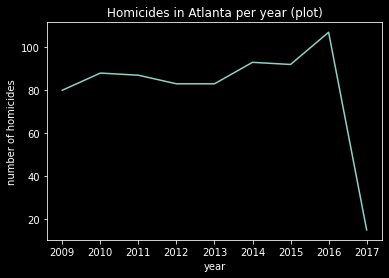

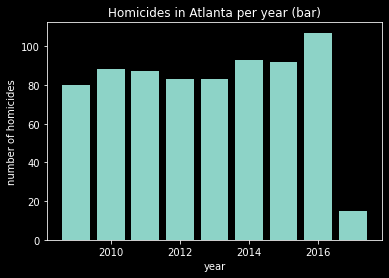

In [90]:
import matplotlib.pyplot as plt

years_to_homicide_series = pd.Series(years_to_homicide)
plt.style.use('dark_background')
plt.title('Homicides in Atlanta per year (plot)')
plt.xlabel('year')
plt.ylabel('number of homicides')
plt.plot(years_to_homicide_series)
plt.show()
plt.title('Homicides in Atlanta per year (bar)')
plt.xlabel('year')
plt.ylabel('number of homicides')
plt.bar(years_to_homicide_series.index, height=years_to_homicide_series)
plt.show()


Compare amount of burglary, robbery and auto theft from 2009 to 2017 (doing mostly the same thing hence less explanation)

                     crime        date
1               AUTO THEFT  10/31/2010
143195          AUTO THEFT  04/12/2014
143204          AUTO THEFT  04/12/2014
143215          AUTO THEFT  04/11/2014
143222          AUTO THEFT  04/11/2014
...                    ...         ...
11578   ROBBERY-PEDESTRIAN  10/04/2013
104127  ROBBERY-PEDESTRIAN  02/27/2016
104123  ROBBERY-PEDESTRIAN  02/28/2016
103693  ROBBERY-PEDESTRIAN  02/04/2015
76483   ROBBERY-PEDESTRIAN  12/05/2013

[95555 rows x 2 columns]
{'AUTO THEFT': 38168, 'BURGLARY-RESIDENCE': 42941, 'ROBBERY-PEDESTRIAN': 14446}


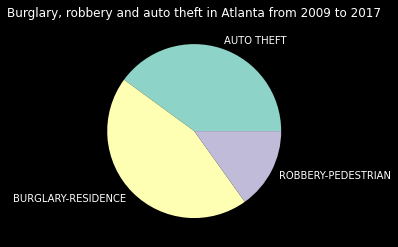

In [92]:
pie_df = df[(df['crime'] == 'BURGLARY-RESIDENCE') | (df['crime'] == 'ROBBERY-PEDESTRIAN') | (df['crime'] == 'AUTO THEFT')]
pie_df = pie_df.sort_values(by=['crime'])
print(pie_df)
pie_dictionary = {'AUTO THEFT':0, 'BURGLARY-RESIDENCE':0, 'ROBBERY-PEDESTRIAN':0}
for index, row in pie_df.iterrows():
    pie_dictionary[row['crime']] += 1
print(pie_dictionary)
pie_series = pd.Series(pie_dictionary)
plt.pie(pie_series, labels=pie_series.index)
plt.title('Burglary, robbery and auto theft in Atlanta from 2009 to 2017')
plt.show()